In [1]:
library(igraph)
library(ggplot2)
library(RColorBrewer)
library(rgl)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


This build of rgl does not include OpenGL functions.  Use
 rglwidget() to display results, e.g. via options(rgl.printRglwidget = TRUE).



$membership
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

$csize
[1] 200

$no
[1] 1

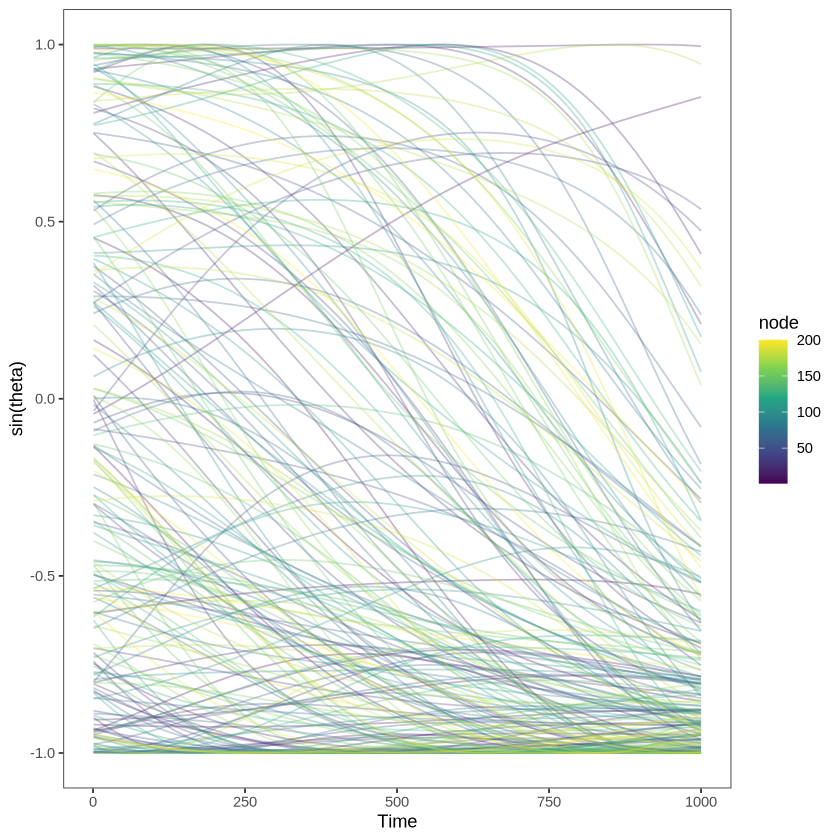

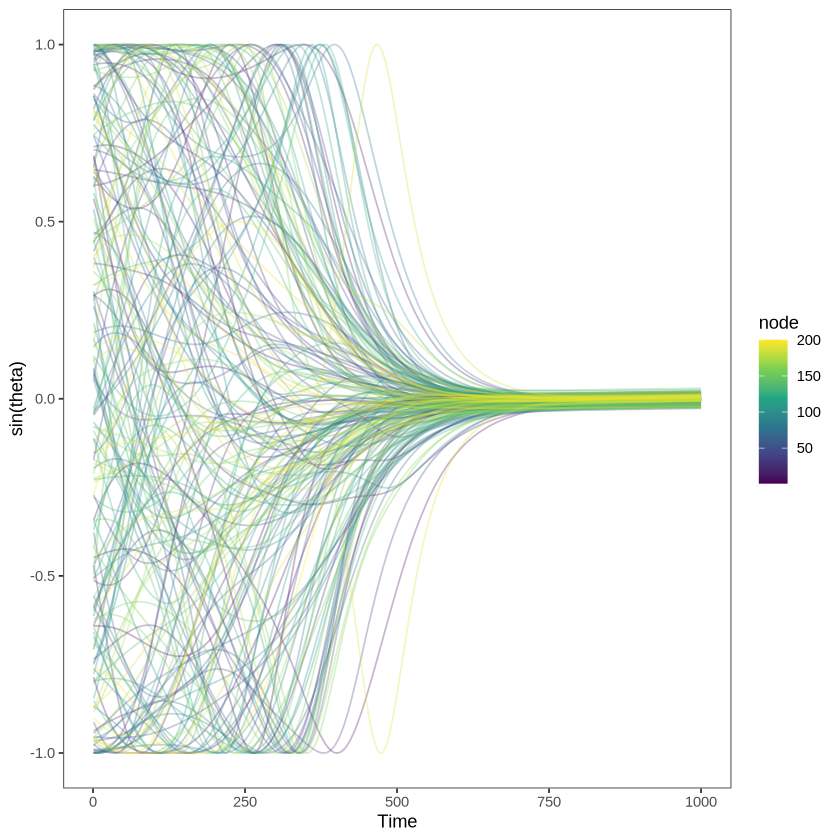

MC # 1 
MC # 2 
MC # 3 
MC # 4 
MC # 5 
MC # 6 
MC # 7 
MC # 8 
MC # 9 
MC # 10 


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


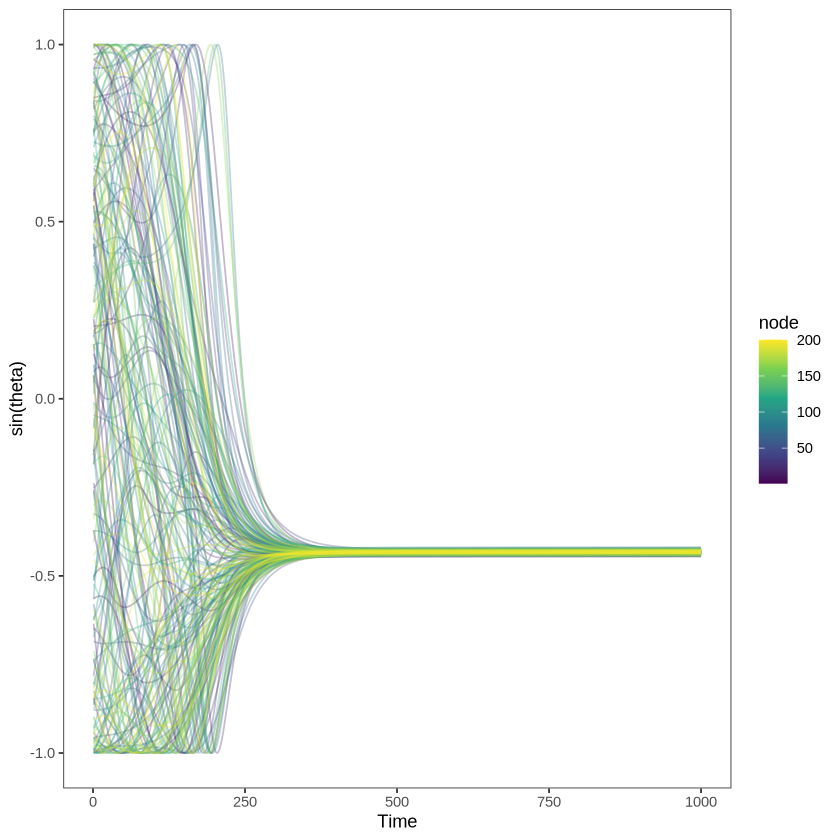

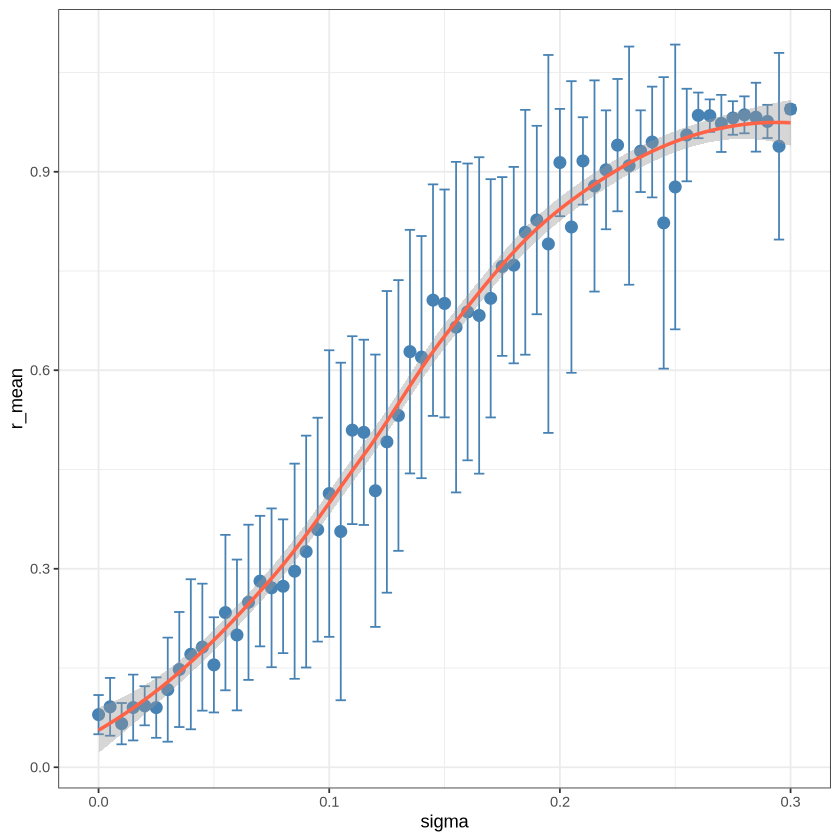

In [3]:
# download:
# https://manliodedomenico.com/tmp/common.R

source("/home/pietromalagoli/PCN/common.R")

set.seed(12)

# Set the number of nodes
N <- 200

# Set the length of the time series to generate
M <- 1000

# Set the number or independent MC realizations to generate
MC <- 1


# Generate an ER 
g <- erdos.renyi.game(N, p=2*log(N)/N, directed=FALSE)
clusters(g)
E(g)$weight <- 1

MultiTS <- KURAMOTO(g, size=M, sd.meas.noise=0., sigma=0.1)
plot.MultiTS(MultiTS)

MultiTS <- KURAMOTO(g, size=M, sd.meas.noise=0., sigma=0.5)
plot.MultiTS(MultiTS)

MultiTS <- KURAMOTO(g, size=M, sd.meas.noise=0., sigma=1)
plot.MultiTS(MultiTS)

# MultiTS_mat <- MultiTS2Matrix(MultiTS)
# MultiTS_df <- reshape2::melt(MultiTS_mat)

# ggplot(MultiTS_df, aes(Var2, Var1, fill=sin(value))) + theme_bw() + geom_tile() + scale_fill_viridis_c()


res <- data.frame()
for(m in 1:10){
     cat(paste("MC #", m, "\n"))
     for(sigma in seq(0,0.3,0.005)){
          MultiTS <- KURAMOTO(g, size=M, sd.meas.noise=0., sigma=sigma)

          x <- 0
          y <- 0
          for(i in 1:length(MultiTS)){
               x <- x + cos(MultiTS[[i]][M])
               y <- y + sin(MultiTS[[i]][M])
          }
          x <- x/N
          y <- y/N

          r <- sqrt(x^2 + y^2)

          res <- rbind(res, data.frame(mc=m, sigma=sigma, r=r))
     }
}

res_mean <- aggregate(r~sigma, res, mean)
res_sd <- aggregate(r~sigma, res, sd)
res_agg <- merge(res_mean, res_sd, by="sigma")
colnames(res_agg) <- c("sigma", "r_mean", "r_sd")
ggplot(res_agg, aes(sigma, r_mean)) + theme_bw() + geom_point(color="steelblue", size=3) + geom_errorbar(aes(ymin=r_mean-r_sd, ymax=r_mean+r_sd), color="steelblue") + geom_smooth(color="tomato")

#outname <- gsub(".edges", "", filename)
#saveRDS(MultiTS, "simul_multi_ts.rds")


